In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
df= pd.read_csv('housing_in_london_monthly_variables.csv')

In [174]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


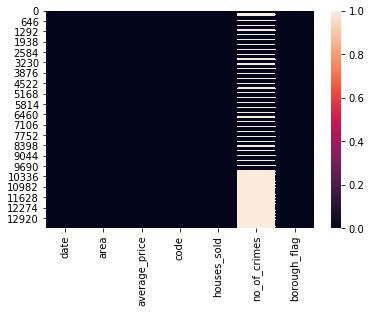

In [175]:
sns.heatmap(df.isnull())

In [176]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [177]:
df=df.dropna(subset=['houses_sold'])
df['no_of_crimes'] = df['no_of_crimes'].fillna(df.groupby('area')['no_of_crimes'].transform('mean'))
london_crime = df['no_of_crimes'][0]
df = df.fillna(london_crime)

In [178]:
df.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

In [179]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,0.423423,1
1,1995-02-01,city of london,82203,E09000001,7.0,0.423423,1
2,1995-03-01,city of london,79121,E09000001,14.0,0.423423,1
3,1995-04-01,city of london,77101,E09000001,7.0,0.423423,1
4,1995-05-01,city of london,84409,E09000001,10.0,0.423423,1


In [180]:
time=df['date'].str.slice(0,4).astype(int)

In [181]:
time

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
13542    2019
13543    2019
13544    2019
13545    2019
13546    2019
Name: date, Length: 13455, dtype: int32

In [182]:
df['date']=time

In [183]:
codenew=df['code'].str.slice(7,9).astype(int)
codenew.unique()
df['code']=codenew

In [184]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995,city of london,91449,1,17.0,0.423423,1
1,1995,city of london,82203,1,7.0,0.423423,1
2,1995,city of london,79121,1,14.0,0.423423,1
3,1995,city of london,77101,1,7.0,0.423423,1
4,1995,city of london,84409,1,10.0,0.423423,1


In [185]:
df['new']=df['houses_sold'].apply(lambda x:x**2)

In [187]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,new,area_n
0,1995,city of london,91449,1,17.0,0.423423,1,289.0,6
1,1995,city of london,82203,1,7.0,0.423423,1,49.0,6
2,1995,city of london,79121,1,14.0,0.423423,1,196.0,6
3,1995,city of london,77101,1,7.0,0.423423,1,49.0,6
4,1995,city of london,84409,1,10.0,0.423423,1,100.0,6


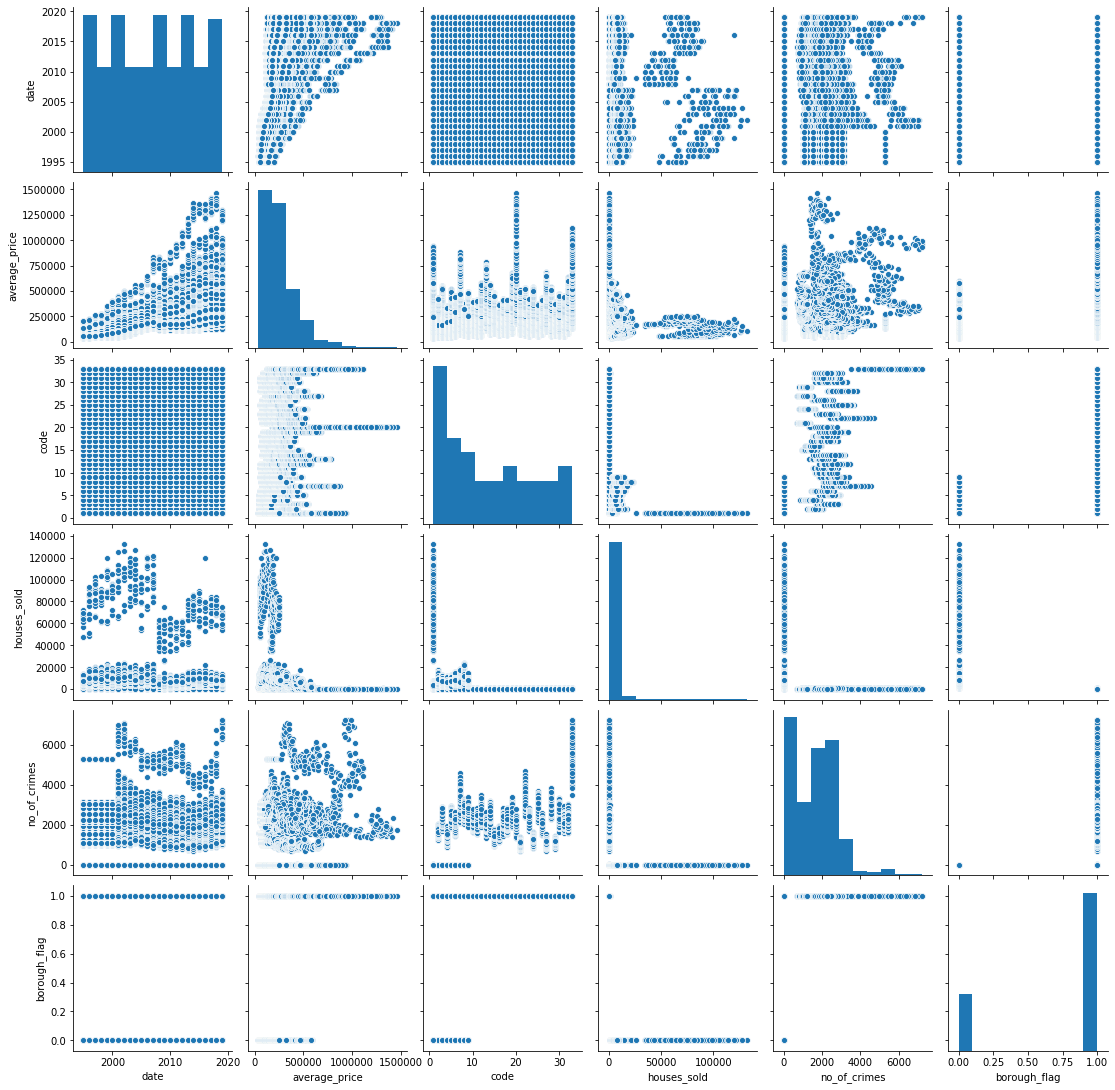

In [24]:
sns.pairplot(df)

In [188]:
from sklearn.preprocessing import LabelEncoder

area = LabelEncoder()

df['area_n'] = area.fit_transform(df['area'])

In [189]:
df=df.drop('area',axis=1)

In [190]:
df

,date,average_price,code,houses_sold,no_of_crimes,borough_flag,new,area_n
0,1995,91449,1,17.0,0.423423,1,2.890000e+02,6
1,1995,82203,1,7.0,0.423423,1,4.900000e+01,6
2,1995,79121,1,14.0,0.423423,1,1.960000e+02,6
3,1995,77101,1,7.0,0.423423,1,4.900000e+01,6
4,1995,84409,1,10.0,0.423423,1,1.000000e+02,6
...,...,...,...,...,...,...,...,...
13542,2019,248562,1,70681.0,0.423423,0,4.995804e+09,12
13543,2019,249432,1,75079.0,0.423423,0,5.636856e+09,12
13544,2019,249942,1,64605.0,0.423423,0,4.173806e+09,12
13545,2019,249376,1,68677.0,0.423423,0,4.716530e+09,12


In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(df)

In [192]:
df

,date,average_price,code,houses_sold,no_of_crimes,borough_flag,new,area_n
0,1995,91449,1,17.0,0.423423,1,2.890000e+02,6
1,1995,82203,1,7.0,0.423423,1,4.900000e+01,6
2,1995,79121,1,14.0,0.423423,1,1.960000e+02,6
3,1995,77101,1,7.0,0.423423,1,4.900000e+01,6
4,1995,84409,1,10.0,0.423423,1,1.000000e+02,6
...,...,...,...,...,...,...,...,...
13542,2019,248562,1,70681.0,0.423423,0,4.995804e+09,12
13543,2019,249432,1,75079.0,0.423423,0,5.636856e+09,12
13544,2019,249942,1,64605.0,0.423423,0,4.173806e+09,12
13545,2019,249376,1,68677.0,0.423423,0,4.716530e+09,12


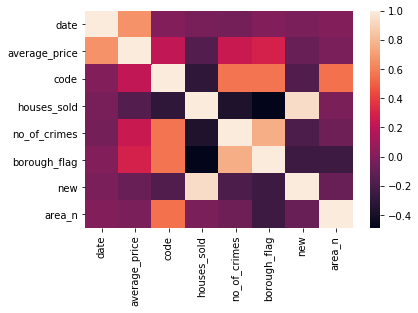

In [193]:
sns.heatmap(df.corr())

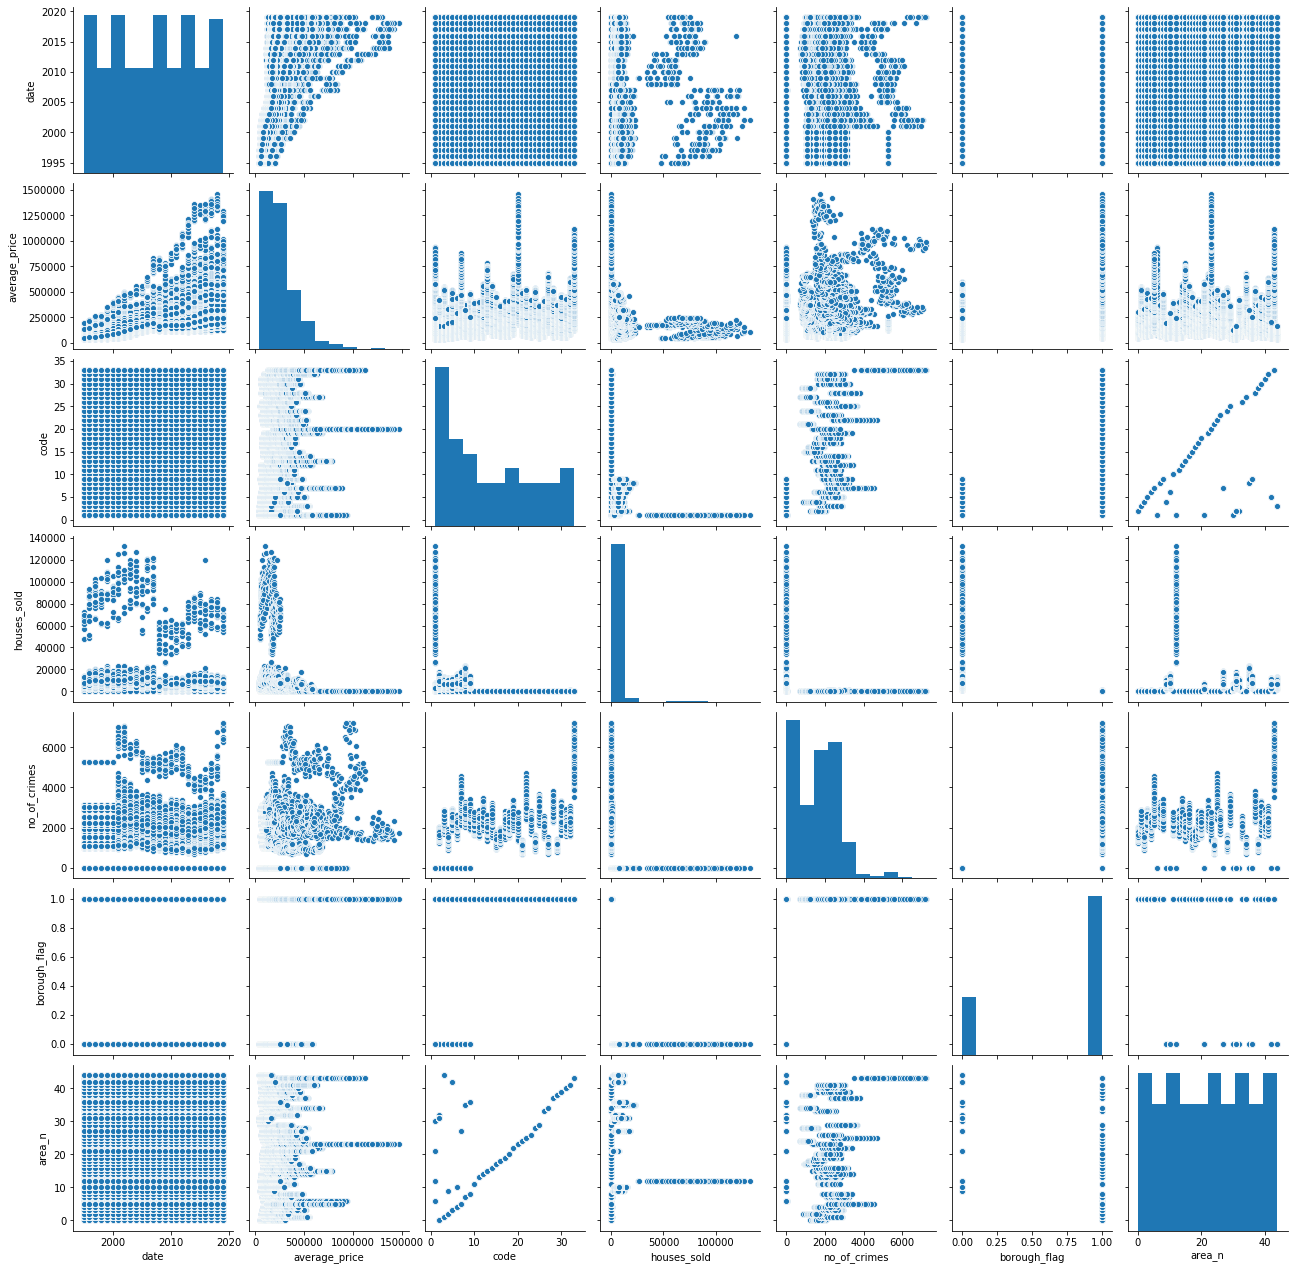

In [120]:
sns.pairplot(df)

In [194]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [195]:
from sklearn.model_selection import train_test_split
X=df.drop('average_price',axis=1)
y=df['average_price']


In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [197]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
from sklearn.metrics import mean_absolute_error

In [199]:
pred=lm.predict(X_test)

82145.79768356422

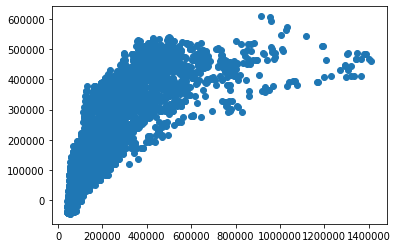

In [200]:
plt.scatter(y_test,pred)
mean_absolute_error(y_test,pred)

In [201]:
from sklearn.tree import DecisionTreeRegressor

In [202]:
dcr=DecisionTreeRegressor()

In [203]:
dcr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [204]:
pred_dcr=dcr.predict(X_test)

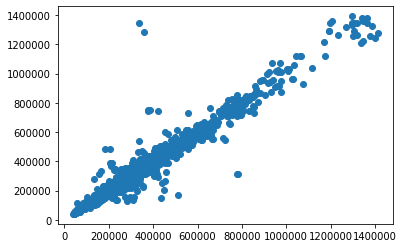

In [205]:
plt.scatter(y_test,pred_dcr)

In [206]:
mean_absolute_error(y_test,pred_dcr)

12568.522010808376

In [208]:
dcr.score(X_test,y_test)

0.9638763051101847